 **Projeto 5** - Resilia + Ifood

Colaboradoras do projeto

* Aline Santos
* Inajá Morais

# **O que foi feito no semestre que foi realizado o curso do VAMOSAI**

Neste **Notebook** será apresentado diferente fontes de dados, sendo elas Youtube,Uber e Ifood. O objetivo do projeto é mostrar quais são nossos gostos pessoais e como tema optamos contar a nossa história baseado no tempo que estamos etudando no curso de análise de dados do vamosAI.

Para mais informações sobre as **bases de dados** finais desse projeto e a **visualização dos dados** via *Tableau*, acesse nosso [repositório](https://github.com/AlinesantosCS/projeto-ifood) no GitHub.

## Biblioteca



In [25]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Localização

Importando a base de dados das localizações no *Google*.

### Google Maps

In [26]:
janeiro = pd.read_json('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_JANUARY.json')
with open('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_JANUARY.json','r') as f:
    data = json.loads(f.read())
janeiro = pd.json_normalize(data, record_path='timelineObjects')
janeiro = pd.DataFrame(janeiro)


fevereiro = pd.read_json('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_FEBRUARY.json')
with open('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_FEBRUARY.json','r') as f:
    data = json.loads(f.read())
fevereiro = pd.json_normalize(data, record_path='timelineObjects')
fevereiro = pd.DataFrame(fevereiro)


março = pd.read_json('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_MARCH.json')
with open('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_MARCH.json','r') as f:
    data = json.loads(f.read())
março = pd.json_normalize(data, record_path='timelineObjects')
março = pd.DataFrame(março)


abril = pd.read_json('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_APRIL.json')
with open('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_APRIL.json','r') as f:
    data = json.loads(f.read())
abril = pd.json_normalize(data, record_path='timelineObjects')
abril = pd.DataFrame(abril)


maio = pd.read_json('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_MAY.json')
with open('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_MAY.json','r') as f:
    data = json.loads(f.read())
maio = pd.json_normalize(data, record_path='timelineObjects')
maio = pd.DataFrame(maio)

junho = pd.read_json('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_JUNE.json')
with open('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_JUNE.json','r') as f:
    data = json.loads(f.read())
junho = pd.json_normalize(data, record_path='timelineObjects')
junho = pd.DataFrame(junho)

julho = pd.read_json('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_JULY.json')
with open('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/Histórico de localização/Semantic Location History/2021/2021_JULY.json','r') as f:
    data = json.loads(f.read())
julho = pd.json_normalize(data, record_path='timelineObjects')
julho  = pd.DataFrame(julho)


In [27]:
df_primeiro_semestre_localizacao = pd.concat([janeiro, fevereiro, março, abril, maio, junho, julho])
df_primeiro_semestre_localizacao.head(10)

,activitySegment.startLocation.latitudeE7,activitySegment.startLocation.longitudeE7,activitySegment.startLocation.sourceInfo.deviceTag,activitySegment.endLocation.latitudeE7,activitySegment.endLocation.longitudeE7,activitySegment.endLocation.sourceInfo.deviceTag,activitySegment.duration.startTimestampMs,activitySegment.duration.endTimestampMs,activitySegment.distance,activitySegment.activityType,activitySegment.confidence,activitySegment.activities,activitySegment.waypointPath.waypoints,activitySegment.simplifiedRawPath.points,activitySegment.parkingEvent.timestampMs,activitySegment.parkingEvent.location.latitudeE7,activitySegment.parkingEvent.location.longitudeE7,activitySegment.parkingEvent.location.accuracyMetres,placeVisit.location.latitudeE7,placeVisit.location.longitudeE7,placeVisit.location.placeId,placeVisit.location.address,placeVisit.location.name,placeVisit.location.sourceInfo.deviceTag,placeVisit.location.locationConfidence,placeVisit.duration.startTimestampMs,placeVisit.duration.endTimestampMs,placeVisit.placeConfidence,placeVisit.centerLatE7,placeVisit.centerLngE7,placeVisit.visitConfidence,placeVisit.otherCandidateLocations,placeVisit.editConfirmationStatus,placeVisit.childVisits,placeVisit.simplifiedRawPath.points,activitySegment.transitPath.transitStops,activitySegment.transitPath.name,activitySegment.transitPath.hexRgbColor,activitySegment.parkingEvent.location.sourceInfo.deviceTag
0,-235172448.0,-474706114.0,-801998242.0,-235038940.0,-474772980.0,-801998242.0,1609601848875,1609602752063,2445.0,IN_PASSENGER_VEHICLE,HIGH,"[{'activityType': 'IN_PASSENGER_VEHICLE', 'pro...","[{'latE7': -235172386, 'lngE7': -474706687}, {...","[{'latE7': -235161114, 'lngE7': -474658470, 't...",1609602840974,-235036877.0,-474771998.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-235039670.0,-474771406.0,ChIJ1a9kx9iLxZQRTPd9fZIZaZ8,"Av. Gen. Carneiro, 914 - Centro\nSorocaba - SP...",DIA Supermercado,-801998242.0,93.747860,1609602752063,1609603571960,HIGH_CONFIDENCE,-235039460.0,-474773040.0,89.0,"[{'latitudeE7': -235046860, 'longitudeE7': -47...",NOT_CONFIRMED,NaN,NaN,NaN,NaN,NaN,NaN
2,-235042397.0,-474772383.0,-801998242.0,-235146228.0,-474747538.0,-801998242.0,1609603571960,1609603812869,1182.0,IN_PASSENGER_VEHICLE,HIGH,"[{'activityType': 'IN_PASSENGER_VEHICLE', 'pro...","[{'latE7': -235043449, 'lngE7': -474772338}, {...",NaN,1609603915770,-235146537.0,-474747446.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-235150287.0,-474743588.0,ChIJDZs3l-6KxZQRt2tPR1gDEkk,"R. Visc. do Rio Branco, 1274 - Vila Jardini\nS...",Condomínio Residencial Nova Manchester,-801998242.0,50.739075,1609603812869,1609605200074,MEDIUM_CONFIDENCE,-235147712.0,-474747718.0,69.0,"[{'latitudeE7': -235150255, 'longitudeE7': -47...",NOT_CONFIRMED,NaN,NaN,NaN,NaN,NaN,NaN
4,-235145539.0,-474746248.0,-801998242.0,-235178357.0,-474699254.0,-801998242.0,1609605200074,1609605328005,602.0,IN_PASSENGER_VEHICLE,HIGH,"[{'activityType': 'IN_PASSENGER_VEHICLE', 'pro...","[{'latE7': -235144805, 'lngE7': -474744682}, {...",NaN,1609605446300,-235171356.0,-474704503.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-235171261.0,-474704781.0,ChIJbTq8gvKKxZQRfnrOizRaSPU,"R. João Crespo Lopes, 151 - Jardim America\nSo...","R. João Crespo Lopes, 151",-801998242.0,63.523900,1609605328005,1609619877963,HIGH_CONFIDENCE,-235171492.0,-474704376.0,71.0,"[{'latitudeE7': -235175602, 'longitudeE7': -47...",NOT_CONFIRMED,NaN,NaN,NaN,NaN,NaN,NaN
6,-235171118.0,-474704755.0,-801998242.0,-235210687.0,-474700445.0,-801998242.0,1609619877963,1609620220332,442.0,WALKING,MEDIUM,"[{'activityType': 'WALKING', 'probability': 63...","[{'latE7': -235170936, 

#### 1.1. Tratamento da base de dados

In [28]:
df_primeiro_semestre_localizacao =df_primeiro_semestre_localizacao[['placeVisit.location.address', 'placeVisit.location.name','placeVisit.location.latitudeE7','placeVisit.location.longitudeE7']]
df_primeiro_semestre_localizacao.head(10)

,placeVisit.location.address,placeVisit.location.name,placeVisit.location.latitudeE7,placeVisit.location.longitudeE7
0,NaN,NaN,NaN,NaN
1,"Av. Gen. Carneiro, 914 - Centro\nSorocaba - SP...",DIA Supermercado,-235039670.0,-474771406.0
2,NaN,NaN,NaN,NaN
3,"R. Visc. do Rio Branco, 1274 - Vila Jardini\nS...",Condomínio Residencial Nova Manchester,-235150287.0,-474743588.0
4,NaN,NaN,NaN,NaN
5,"R. João Crespo Lopes, 151 - Jardim America\nSo...","R. João Crespo Lopes, 151",-235171261.0,-474704781.0
6,NaN,NaN,NaN,NaN
7,NaN,Paróquia Nossa Senhora de Fátima,-235212640.0,-474699509.0
8,NaN,NaN,NaN,NaN
9,"R. João Crespo Lopes, 151 - Jardim America\nSo...","R. João Crespo Lopes, 151",-235171261.0,-474704781.0


In [29]:
df_primeiro_semestre_localizacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 0 to 136
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   placeVisit.location.address      759 non-null    object 
 1   placeVisit.location.name         788 non-null    object 
 2   placeVisit.location.latitudeE7   789 non-null    float64
 3   placeVisit.location.longitudeE7  789 non-null    float64
dtypes: float64(2), object(2)
memory usage: 61.3+ KB


In [30]:
df_primeiro_semestre_localizacao['placeVisit.location.latitudeE7'] =  df_primeiro_semestre_localizacao['placeVisit.location.latitudeE7'] / 1e7
df_primeiro_semestre_localizacao['placeVisit.location.longitudeE7'] =  df_primeiro_semestre_localizacao['placeVisit.location.longitudeE7'] / 1e7

In [31]:
df_primeiro_semestre_localizacao = df_primeiro_semestre_localizacao.rename(columns={'placeVisit.location.latitudeE7': 'latitude'})
df_primeiro_semestre_localizacao = df_primeiro_semestre_localizacao.rename(columns={'placeVisit.location.longitudeE7': 'longitude'})
df_primeiro_semestre_localizacao = df_primeiro_semestre_localizacao.rename(columns={'placeVisit.location.address': 'address'})
df_primeiro_semestre_localizacao = df_primeiro_semestre_localizacao.rename(columns={'placeVisit.location.name': 'name_location'})

In [32]:
df_primeiro_semestre_localizacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 0 to 136
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        759 non-null    object 
 1   name_location  788 non-null    object 
 2   latitude       789 non-null    float64
 3   longitude      789 non-null    float64
dtypes: float64(2), object(2)
memory usage: 61.3+ KB


In [33]:
df_primeiro_semestre_localizacao.shape[0]

1569

In [34]:
df_primeiro_semestre_localizacao = pd.DataFrame(df_primeiro_semestre_localizacao).reset_index(drop=True)
df_primeiro_semestre_localizacao.head(10)

,address,name_location,latitude,longitude
0,NaN,NaN,NaN,NaN
1,"Av. Gen. Carneiro, 914 - Centro\nSorocaba - SP...",DIA Supermercado,-23.503967,-47.477141
2,NaN,NaN,NaN,NaN
3,"R. Visc. do Rio Branco, 1274 - Vila Jardini\nS...",Condomínio Residencial Nova Manchester,-23.515029,-47.474359
4,NaN,NaN,NaN,NaN
5,"R. João Crespo Lopes, 151 - Jardim America\nSo...","R. João Crespo Lopes, 151",-23.517126,-47.470478
6,NaN,NaN,NaN,NaN
7,NaN,Paróquia Nossa Senhora de Fátima,-23.521264,-47.469951
8,NaN,NaN,NaN,NaN
9,"R. João Crespo Lopes, 151 - Jardim America\nSo...","R. João Crespo Lopes, 151",-23.517126,-47.470478


In [35]:
df_primeiro_semestre_localizacao = df_primeiro_semestre_localizacao.dropna()

In [36]:
df_primeiro_semestre_localizacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 1 to 1568
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        759 non-null    object 
 1   name_location  759 non-null    object 
 2   latitude       759 non-null    float64
 3   longitude      759 non-null    float64
dtypes: float64(2), object(2)
memory usage: 29.6+ KB


In [38]:
df_primeiro_semestre_localizacao['address'] = df_primeiro_semestre_localizacao['address'].apply(lambda x : x.replace('\n',' '))

#### 1.2. Exploração das bases de dados

##### 1.2.1 - Lugares que mais visitados

In [37]:
df_primeiro_semestre_localizacao['address'].value_counts(dropna=False).head(10)

R. João Crespo Lopes, 151 - Jardim America\nSorocaba - SP\n18046-785\nBrasil                     335
R. Visc. do Rio Branco, 1200 - Vila Jardini\nSorocaba - SP\n18044-000\nBrasil                     48
R. Assunção, 491 - Jardim America\nSorocaba - SP\n18046-805\nBrasil                               31
Av. Antônio Carlos Comitre, 80 - Parque Campolim\nSorocaba - SP\n18047-620\nBrasil                24
Av. Gen. Carneiro, 1120 - Vila Lucy\nSorocaba - SP\n18043-003\nBrasil                             21
Av. Dr. Afonso Vergueiro, 823 - Centro\nSorocaba - SP\n18035-370\nBrasil                          20
R. Martinica, 112 - Jardim America\nSorocaba - SP\n18046-805\nBrasil                              15
Jardim America\nSorocaba - SP\n18030-000\nBrasil                                                  11
Av. Dr. Afonso Vergueiro, 1700 - Centro\nSorocaba - SP\n18040-000\nBrasil                          8
Avenida Professora Izoraida Marques Peres - Parque Campolim\nSorocaba - SP\n18110-650\nBras

##### 1.2.1 - Os nomes dos lugares mais visitados

In [39]:
df_primeiro_semestre_localizacao['name_location'].value_counts(dropna=False).head(10)

R. João Crespo Lopes, 151       335
R. Visc. do Rio Branco, 1200     48
Nova Esplanada Mercearia         31
Sam's Club                       24
Tauste General Carneiro          21
Pátio Cianê Shopping             20
Construtora Verônica             15
Super Posto JC                   11
Sorocaba Shopping                 8
LR CONSERTOS                      7
Name: name_location, dtype: int64

#### 1.3. Visualização das bases de dados - Google Maps

In [40]:
divisao = df_primeiro_semestre_localizacao['address'].str.split('SP')
endereco = divisao.str.get(0)
df_primeiro_semestre_localizacao['address'] = endereco

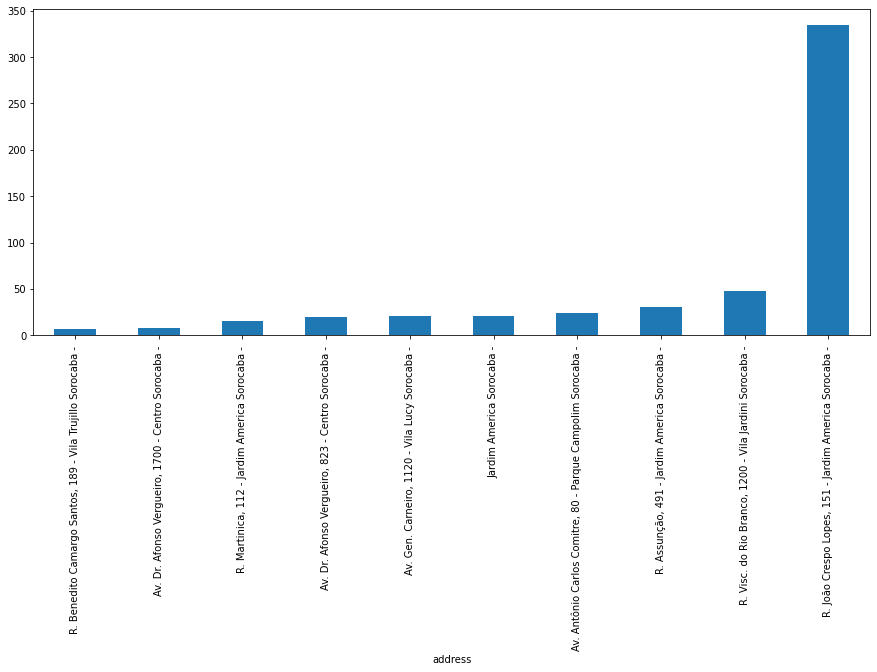

In [41]:
df_primeiro_semestre_localizacao.groupby(['address']).address.count().sort_values()[-10:].plot(kind='bar',figsize=(15,6))

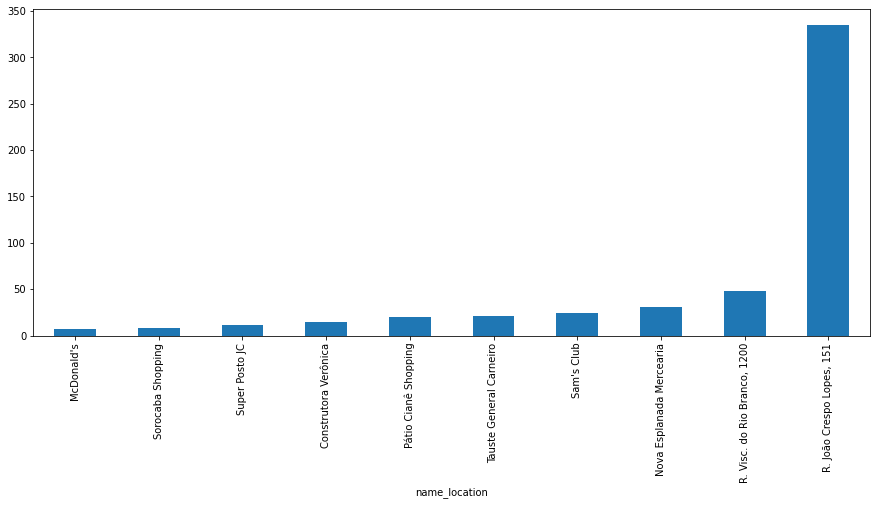

In [42]:
df_primeiro_semestre_localizacao.groupby(['name_location']).address.count().sort_values()[-10:].plot(kind='bar',figsize=(15,6))

## Música

### Spotify

Importação da base dados de histórico de músicas do *Spotify*.

In [45]:
df_musica_inaja = pd.read_json('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/spotify-inajá/StreamingHistory1.json')
df_musica_inaja.head(10)

,endTime,artistName,trackName,msPlayed
0,2021-03-25 13:11,Wry,Man in the Mirror - Electropaulo Rmx,68943
1,2021-03-25 13:31,Vintage Culture,Várias Queixas - Radio Edit,155702
2,2021-03-25 13:34,Cypress Hill,Champion Sound,183560
3,2021-03-25 13:35,Rita Benneditto,Com o Afeto das Canções,92897
4,2021-03-25 13:35,Rodrigo Sha,Do Guarani Ao Guaraná,8340
5,2021-03-25 13:36,Cypress Hill,Champion Sound,43820
6,2021-03-25 13:37,David Bowie,Strangers When We Meet - Live at the National ...,55450
7,2021-03-25 13:40,Alceu Valença,Sem Pensar No Amanhã,156250
8,2021-03-25 13:42,Pato Fu,Made In Japan / Capetão 66.6 FM (Ao Vivo),123949
9,2021-03-25 13:50,Erasure,Ave Maria,484708


#### 2.1. Tratamento da base de dados

In [46]:
df_musica_inaja["endTime"] = pd.to_datetime(df_musica_inaja["endTime"])
df_musica_inaja ["date"] = df_musica_inaja["endTime"].dt.strftime("%Y-%m-%d")
df_musica_inaja ["hour"] = df_musica_inaja["endTime"].dt.strftime("%H:%M:%S")

In [47]:
df_musica_inaja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     6626 non-null   datetime64[ns]
 1   artistName  6626 non-null   object        
 2   trackName   6626 non-null   object        
 3   msPlayed    6626 non-null   int64         
 4   date        6626 non-null   object        
 5   hour        6626 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 310.7+ KB


In [48]:
df_musica_semestre = (df_musica_inaja['date'] >= '2021-01-01') & (df_musica_inaja['date'] <= '2021-07-20')
df_primeiro_semestre_musica = df_musica_inaja[df_musica_semestre]

In [49]:
df_primeiro_semestre_musica.drop(['endTime', 'hour'], axis=1, inplace=True)

In [50]:
df_primeiro_semestre_musica = df_primeiro_semestre_musica.rename(columns={'trackName': 'trackNameInaja'})
df_primeiro_semestre_musica = df_primeiro_semestre_musica.rename(columns={'artistName': 'artistNameInaja'})

In [51]:
df_primeiro_semestre_musica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626 entries, 0 to 6625
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artistNameInaja  6626 non-null   object
 1   trackNameInaja   6626 non-null   object
 2   msPlayed         6626 non-null   int64 
 3   date             6626 non-null   object
dtypes: int64(1), object(3)
memory usage: 258.8+ KB


In [52]:
df_primeiro_semestre_musica = pd.DataFrame(df_primeiro_semestre_musica).reset_index(drop=True)
df_primeiro_semestre_musica.head(10)

,artistNameInaja,trackNameInaja,msPlayed,date
0,Wry,Man in the Mirror - Electropaulo Rmx,68943,2021-03-25
1,Vintage Culture,Várias Queixas - Radio Edit,155702,2021-03-25
2,Cypress Hill,Champion Sound,183560,2021-03-25
3,Rita Benneditto,Com o Afeto das Canções,92897,2021-03-25
4,Rodrigo Sha,Do Guarani Ao Guaraná,8340,2021-03-25
5,Cypress Hill,Champion Sound,43820,2021-03-25
6,David Bowie,Strangers When We Meet - Live at the National ...,55450,2021-03-25
7,Alceu Valença,Sem Pensar No Amanhã,156250,2021-03-25
8,Pato Fu,Made In Japan / Capetão 66.6 FM (Ao Vivo),123949,2021-03-25
9,Erasure,Ave Maria,484708,2021-03-25


#### 2.2. Exploração das bases de dados

##### 2.2.1 - Os artistas mais escutados

In [53]:
df_primeiro_semestre_musica['artistNameInaja'].value_counts(dropna=False).head(10)

Seu Jorge                 128
Luiz Gonzaga              106
Madonna                   102
H.E.R.                    101
Marisa Monte               98
Os Barões Da Pisadinha     92
Maria Bethânia             85
The Beatles                78
Nana Caymmi                77
Rihanna                    72
Name: artistNameInaja, dtype: int64

##### 2.2.3 - As músicas mais escutas 

In [54]:
df_primeiro_semestre_musica['trackNameInaja'].value_counts(dropna=False).head(10)

Crazy                                 16
Recairei - Ao Vivo                    15
As Canções Que Você Fez Pra Mim       15
Wannabe                               14
Feeling Good                          13
A Little Respect - 2009 - Remaster    12
Killing Me Softly With His Song       12
At Last                               12
Hallelujah                            12
Life On Mars?                         12
Name: trackNameInaja, dtype: int64

#### 2.3. Visualização das bases de dados - Spotify

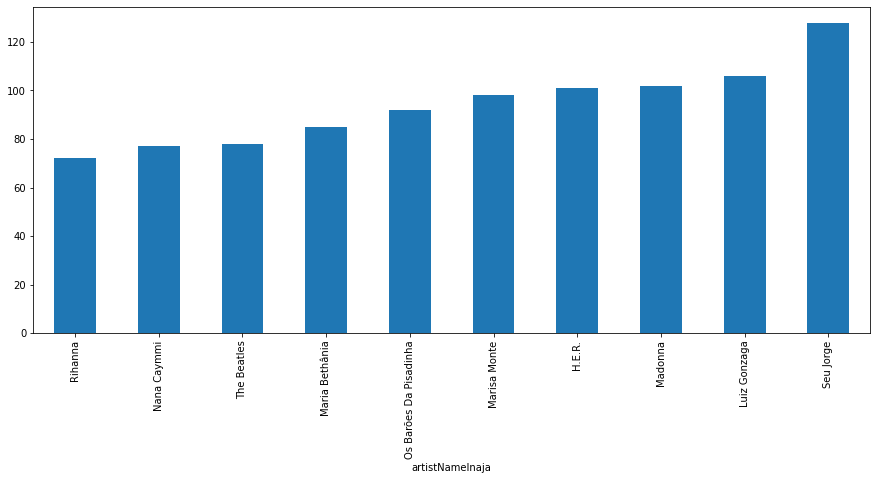

In [55]:
df_primeiro_semestre_musica.groupby(['artistNameInaja']).artistNameInaja.count().sort_values()[-10:].plot(kind='bar',figsize=(15,6))

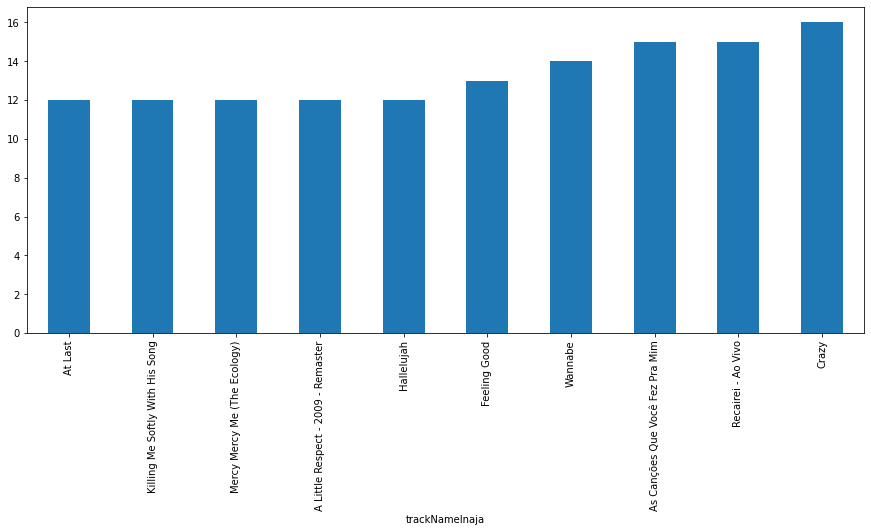

In [56]:
df_primeiro_semestre_musica.groupby(['trackNameInaja']).trackNameInaja.count().sort_values()[-10:].plot(kind='bar',figsize=(15,6))

In [57]:
df_primeiro_semestre_musica.to_csv('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/dados-prontos/dados_musica_inaja.csv', sep = ';')

Importação da base dados de playlist do *Spotify*.

In [58]:
df_playlist = pd.read_json('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/spotify-inajá/Playlist1.json')
df_playlist

,playlists
0,"{'name': 'Funk', 'lastModifiedDate': '2021-02-..."
1,"{'name': '1900', 'lastModifiedDate': '2020-10-..."
2,"{'name': 'Meditação', 'lastModifiedDate': '202..."
3,"{'name': 'Mutantes', 'lastModifiedDate': '2020..."
4,"{'name': 'New Life', 'lastModifiedDate': '2020..."
5,"{'name': 'Miscelânea', 'lastModifiedDate': '20..."
6,"{'name': 'Faxinão', 'lastModifiedDate': '2018-..."
7,"{'name': 'MPB by Nina 💕', 'lastModifiedDate': ..."
8,"{'name': 'Pop by Nina 💕', 'lastModifiedDate': ..."
9,"{'name': 'Funk by Nina 💕', 'lastModifiedDate':..."


In [59]:
from pandas.io.json import json_normalize

with open('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/spotify-inajá/Playlist1.json') as json_data:
    df_playlist = json.load(json_data)

In [60]:
df_playlist = pd.json_normalize(df_playlist, record_path='playlists')
df_playlist.head(10)

,name,lastModifiedDate,items,description,numberOfFollowers
0,Funk,2021-02-09,"[{'track': {'trackName': 'Avançada', 'artistNa...",None,0
1,1900,2020-10-13,"[{'track': {'trackName': 'Alguém Me Avisou', '...",None,0
2,Meditação,2020-08-13,"[{'track': None, 'episode': {'episodeName': 'M...",None,0
3,Mutantes,2020-01-28,[{'track': {'trackName': 'Ando Meio Desligado'...,None,0
4,New Life,2020-10-02,"[{'track': {'trackName': 'Verdinha', 'artistNa...",None,0
5,Miscelânea,2019-08-27,[{'track': {'trackName': 'Evergreen (Love Them...,None,0
6,Faxinão,2018-09-17,[{'track': {'trackName': 'Vai malandra (feat. ...,None,0
7,MPB by Nina 💕,2018-09-17,"[{'track': {'trackName': 'Águas De Março', 'ar...",None,0
8,Pop by Nina 💕,2018-09-17,"[{'track': {'trackName': 'Shape of You', 'arti...",None,0
9,Funk by Nina 💕,2021-02-09,"[{'track': {'trackName': 'Vai Embrazando', 'ar...",None,0


#### 2.1.1. Tratamento da base de dados

In [61]:
df_playlist_semestre = (df_playlist['lastModifiedDate'] >= '2021-01-01') & (df_playlist['lastModifiedDate'] <= '2021-07-20')
df_playlist_semestre = df_playlist[df_playlist_semestre]

In [62]:
df_playlist_semestre.drop(['items', 'description'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 2.2.2. Exploração das bases de dados

In [63]:
df_playlist_semestre = df_playlist_semestre.reset_index(drop=True)
df_playlist_semestre

,name,lastModifiedDate,numberOfFollowers
0,Funk,2021-02-09,0
1,Funk by Nina 💕,2021-02-09,0


### Youtube

Importação da base dados de histórico de visualização do *Youtube*.

In [64]:
df_youtube_inaja = pd.read_json('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/google-inajá/Takeout/YouTube e YouTube Music/histórico/histórico-de-visualização.json')
df_youtube_inaja.head(10)

,header,title,titleUrl,subtitles,time,products,details
0,YouTube,Watched Santa Missa do 16° Domingo do Tempo Co...,https://www.youtube.com/watch?v=zT5WBXKdftk,[{'name': 'PARÓQUIA NOSSA SENHORA DE FÁTIMA SO...,2021-07-18T20:59:59.628Z,[YouTube],NaN
1,YouTube,Watched PITCH: O QUE É E COMO ESTRUTURAR O SEU,https://www.youtube.com/watch?v=7161Ev2xvKw,"[{'name': 'Na Prática', 'url': 'https://www.yo...",2021-07-16T18:51:42.105Z,[YouTube],NaN
2,YouTube,Watched How to stop screwing yourself over | M...,https://www.youtube.com/watch?v=Lp7E973zozc,"[{'name': 'TEDx Talks', 'url': 'https://www.yo...",2021-07-15T03:04:12.756Z,[YouTube],NaN
3,YouTube,Watched How to Figure Out What You Really Want...,https://www.youtube.com/watch?v=bRtBHF-WPpM,"[{'name': 'TEDx Talks', 'url': 'https://www.yo...",2021-07-15T02:44:39.715Z,[YouTube],NaN
4,YouTube,Watched The Future Of Work - People Analytics,https://www.youtube.com/watch?v=Iaj311n37Fc,"[{'name': 'ADP Brasil', 'url': 'https://www.yo...",2021-07-15T01:33:33.668Z,[YouTube],NaN
5,YouTube,Watched O que é People Analytics e como coloca...,https://www.youtube.com/watch?v=C88ZTv8glYA,"[{'name': 'Sólides Tecnologia', 'url': 'https:...",2021-07-15T01:30:30.725Z,[YouTube],NaN
6,YouTube,Watched O que é People Analytics? | RH Academy,https://www.youtube.com/watch?v=tWiBe8tK2GE,"[{'name': 'RH Academy', 'url': 'https://www.yo...",2021-07-15T00:55:34.686Z,[YouTube],NaN
7,YouTube,Watched Testamos Nossa Paciência Reagindo a Va...,https://www.youtube.com/watch?v=RGi24q4NAEM,"[{'name': 'Código Fonte TV', 'url': 'https://w...",2021-07-15T00:27:53.755Z,[YouTube],NaN
8,YouTube,Watched O que é o Potências Negras?,https://www.youtube.com/watch?v=_LuFqHGWnb8,"[{'name': 'Potências Negras', 'url': 'https://...",2021-07-15T00:26:02.077Z,[YouTube],NaN
9,YouTube,Watched PYTHON 28 - Operações entre colunas d...,https://www.youtube.com/watch?v=db4pOILqgYY,"[{'name': 'Marco Antonio Leonel Caetano', 'url...",2021-07-06T22:21:31.254Z,[YouTube],NaN


#### 2.1.1.1. Tratamento da base de dados

In [65]:
df_youtube_inaja = df_youtube_inaja.rename(columns={'title': 'title_inaja'})

In [66]:
df_youtube_inaja["time"] = pd.to_datetime(df_youtube_inaja["time"])
df_youtube_inaja["day_youtube_inaja"] = df_youtube_inaja["time"].dt.strftime("%Y-%m-%d")
df_youtube_inaja["hour"] = df_youtube_inaja["time"].dt.strftime("%H:%M:%S")

In [67]:
df_youtube_semestre  = (df_youtube_inaja["day_youtube_inaja"] >= '2021-01-01') & (df_youtube_inaja["day_youtube_inaja"] <= '2021-07-20')
df_primeiro_semestre_youtube = df_youtube_inaja[df_youtube_semestre]

In [68]:
df_primeiro_semestre_youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 286
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   header             287 non-null    object             
 1   title_inaja        287 non-null    object             
 2   titleUrl           287 non-null    object             
 3   subtitles          269 non-null    object             
 4   time               287 non-null    datetime64[ns, UTC]
 5   products           287 non-null    object             
 6   details            6 non-null      object             
 7   day_youtube_inaja  287 non-null    object             
 8   hour               287 non-null    object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 22.4+ KB


In [69]:
df_primeiro_semestre_youtube.shape[0]

287

In [70]:
df_primeiro_semestre_youtube.drop(['header', 'titleUrl','subtitles','products','hour','time','details'], axis=1, inplace=True)

In [71]:
df_primeiro_semestre_youtube.head(10)

,title_inaja,day_youtube_inaja
0,Watched Santa Missa do 16° Domingo do Tempo Co...,2021-07-18
1,Watched PITCH: O QUE É E COMO ESTRUTURAR O SEU,2021-07-16
2,Watched How to stop screwing yourself over | M...,2021-07-15
3,Watched How to Figure Out What You Really Want...,2021-07-15
4,Watched The Future Of Work - People Analytics,2021-07-15
5,Watched O que é People Analytics e como coloca...,2021-07-15
6,Watched O que é People Analytics? | RH Academy,2021-07-15
7,Watched Testamos Nossa Paciência Reagindo a Va...,2021-07-15
8,Watched O que é o Potências Negras?,2021-07-15
9,Watched PYTHON 28 - Operações entre colunas d...,2021-07-06


In [72]:
df_primeiro_semestre_youtube = df_primeiro_semestre_youtube.drop(df_primeiro_semestre_youtube.loc[df_primeiro_semestre_youtube['title_inaja'] == 'Watched https://www.youtube.com/watch?v=KtBbyglq37E'].index)
df_primeiro_semestre_youtube = df_primeiro_semestre_youtube.drop(df_primeiro_semestre_youtube.loc[df_primeiro_semestre_youtube['title_inaja'] == 'Watched a video that has been removed'].index)

In [73]:
divisao = df_primeiro_semestre_youtube['title_inaja'].str.split('Watched')
musica = divisao.str.get(1)
df_primeiro_semestre_youtube['title_inaja'] = musica

#### 2.2.2.2. Exploração das bases de dados

##### 2.2.2.2.1. - Os últimos videos assistidos 

In [74]:
df_primeiro_semestre_youtube['title_inaja'].value_counts(dropna=False).head(10)

 Curso Python #06 - Tipos Primitivos e Saída de Dados                     9
 Curso Python #20 - Funções (Parte 1)                                     6
 Curso Python #05 - Instalando o PyCharm e o QPython3                     5
 Curso Python #01 - Seja um Programador                                   5
 Curso Python #08 - Utilizando Módulos                                    5
 Consumindo dados da API do YOUTUBE com Python | Python na Prática #11    5
 Curso Python #07 - Operadores Aritméticos                                4
 Exercício Python #023 - Separando dígitos de um número                   4
 O que é API? REST e RESTful? aprenda com Star Wars!                      4
 Instalações e configurações importantes - Curso de Git e GitHub          4
Name: title_inaja, dtype: int64

#### 2.3.3.3. Visualização das bases de dados - Youtube

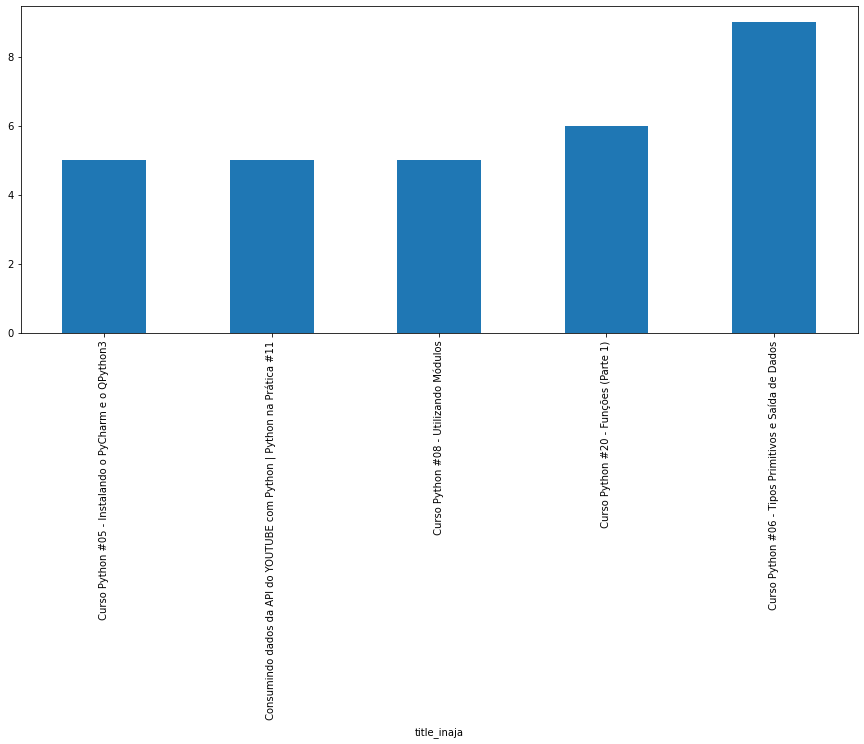

In [75]:
df_primeiro_semestre_youtube.groupby(['title_inaja']).title_inaja.count().sort_values()[-5:].plot(kind='bar',figsize=(15,6))

##Comida

Importação de dados dos pedidos realizados no *Ifood*.

###Ifood

In [76]:
df_comida_inaja = pd.read_csv('/content/drive/MyDrive/VAMOAI/Projeto/Inajá/ifood-inajá/pedidos..csv')
df_comida_inaja.head(10)

,id_usuario,id_pedido,restaurante,valor,status,data_registro,data_pedido
0,d22cc5a1-c48f-4298-b417-bcc953a17115,3216973398,Tammy Pastelaria Express - Jd Simus,41.39,CONCLUDED,2020-03-08,2021-05-25
1,d22cc5a1-c48f-4298-b417-bcc953a17115,2825147175,Mcdonald's - Campolim,27.89,CONCLUDED,2020-03-08,2021-01-27
2,d22cc5a1-c48f-4298-b417-bcc953a17115,2428772020,Domino's Pizza - General Carneiro,53.80,CONCLUDED,2020-03-08,2020-10-31
3,d22cc5a1-c48f-4298-b417-bcc953a17115,4116716815,Kanban Pastelaria - Shopping Panoramico,43.89,CONCLUDED,2020-03-08,2021-07-16


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 3.1. Tratamento da base de dados

In [78]:
df_alimentacao  = (df_comida_inaja['data_pedido'] >= '2021-01-01') & (df_comida_inaja['data_pedido'] <= '2021-07-20')
df_alimentacao_semestre = df_comida_inaja[df_alimentacao]

In [79]:
df_alimentacao_semestre = df_alimentacao_semestre.rename(columns={'restaurante': 'restaurante_inaja'})
df_alimentacao_semestre = df_alimentacao_semestre.rename(columns={'valor': 'valor_inaja'})

In [80]:
df_alimentacao_semestre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 3
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_usuario         3 non-null      object 
 1   id_pedido          3 non-null      int64  
 2   restaurante_inaja  3 non-null      object 
 3   valor_inaja        3 non-null      float64
 4   status             3 non-null      object 
 5   data_registro      3 non-null      object 
 6   data_pedido        3 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 192.0+ bytes


In [81]:
df_alimentacao_semestre.drop(['id_usuario', 'id_pedido','status','data_registro'], axis=1, inplace=True)

#### 3.2. Exploração das bases de dados

##### 3.2.1 - Gastos no periodo de seis meses

In [82]:
df_alimentacao_semestre.reset_index(drop=True)

,restaurante_inaja,valor_inaja,data_pedido
0,Tammy Pastelaria Express - Jd Simus,41.39,2021-05-25
1,Mcdonald's - Campolim,27.89,2021-01-27
2,Kanban Pastelaria - Shopping Panoramico,43.89,2021-07-16


##### 3.2.2 - Os restaurantes mais pedidos no Ifood

In [83]:
df_alimentacao_semestre['restaurante_inaja'].value_counts(dropna=False).head(10)

Mcdonald's - Campolim                      1
Kanban Pastelaria - Shopping Panoramico    1
Tammy Pastelaria Express - Jd Simus        1
Name: restaurante_inaja, dtype: int64

#### 3.3. Visualização das bases de dados - Ifood

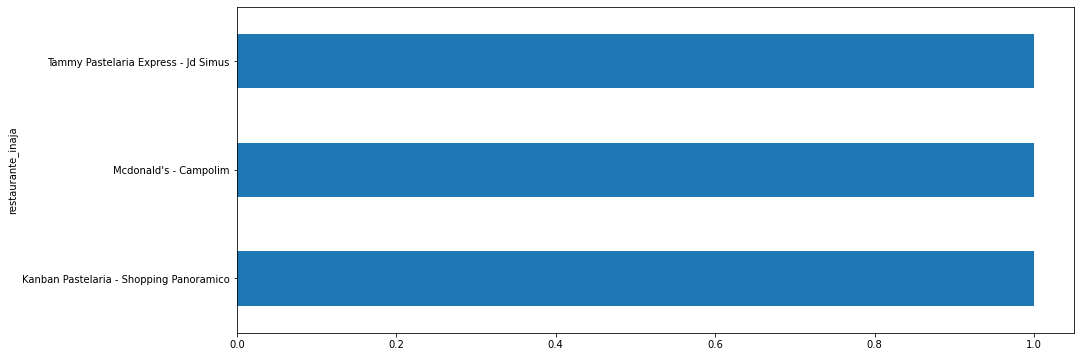

In [84]:
df_alimentacao_semestre.groupby(['restaurante_inaja']).restaurante_inaja.count().sort_values()[-10:].plot(kind='barh',figsize=(15,6))

In [85]:
fig = px.line(
    df_alimentacao_semestre, x='data_pedido', y='valor_inaja',
    title='Valor dos pedidos no primeiro semestre de 2021'
)
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Valor Gasto')

fig.show()